<a href="https://colab.research.google.com/github/bradykuo/Numerical-Optimization/blob/main/DEA_IPM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random


def determineStepSize(x,d,r):
    n=len(d)
    stepSize=float("inf")
    for i in range(n):
        if d[i] < 0 and stepSize>-x[i]/d[i]:
            stepSize=-x[i]/d[i]

    stepSize=min([1,r*stepSize])
    return stepSize

def IPM(A,b,c,x0):
    y0 = [[random.randint(1,100)],[random.randint(1,100)],[random.randint(1,100)],[random.randint(1,100)],[random.randint(1,100)],[random.randint(1,100)]]
    s0 = [[random.randint(1,100)],[random.randint(1,100)],[random.randint(1,100)],[random.randint(1,100)],[random.randint(1,100)],[random.randint(1,100)],[random.randint(1,100)],[random.randint(1,100)]]
    mu=[10]
    r=0.6
    mu_0=10
    epsilon=1e-6
    e=np.ones((8,1))
    k=0

    while mu[k]>epsilon*mu_0:
        #mu[k]=mu_0*(1/10)**k
        x0=np.array(x0)
        y0=np.array(y0)
        s0=np.array(s0)
        solution=np.vstack((x0,y0,s0))

        X=np.diag(x0[:,0])
        S=np.diag(s0[:,0])

        r1=b-A.dot(x0)
        r2=c-A.transpose().dot(y0)-s0
        r3=mu[k]*e-X.dot(S).dot(e)
        residual=np.vstack((r1,r2,r3))

        A1=np.hstack((A,np.zeros((6,6)),np.zeros((6,8))))
        A2=np.hstack((np.zeros((8,8)),A.transpose(),np.identity(8)))
        A3=np.hstack((S,np.zeros((8,6)),X))
        barA=np.vstack((A1,A2,A3))

        NewtonDirection=np.linalg.inv(barA).dot(residual)
        delta_x=NewtonDirection[0:8,0].reshape(8,1)
        delta_y=NewtonDirection[8:14,0].reshape(6,1)
        delta_s=NewtonDirection[14:22,0].reshape(8,1)

        stepSizeX=determineStepSize(x0,delta_x,r)
        stepSizeS=determineStepSize(s0,delta_s,r)
        x0=x0+stepSizeX*delta_x
        y0=y0+stepSizeS*delta_y
        s0=s0+stepSizeS*delta_s
        #mu[k+1]=(1/10)*x0.transpose().dot(s0)/4
        #complementary condition
        mu.append((1/10)*x0.transpose().dot(s0)/8)
        print("mu is ",mu[k+1])
        #print("stepSizeX is ",stepSizeX)
        #print("stepSizeS is ",stepSizeS)
        print('k=',k+1)
        print(x0)
        k=k+1

    print("optimal value =", x0[0]*1000/(x0[1]*c[1]+x0[2]*c[2]))



In [ ]:
A=[[1000,0,0,0,0,0,0,0],[-1000,2,300,-1,0,0,0,0],[-1000,3,200,0,-1,0,0,0],[-1000,4,100,0,0,-1,0,0],[-1000,2,200,0,0,0,-1,0],[-1000,1,400,0,0,0,0,-1]]
b=[[1],[0],[0],[0],[0],[0]]
c=[[0],[2],[300],[0],[0],[0],[0],[0]]
A=np.array(A)
b=np.array(b)
c=np.array(c)

x0 = [[1],[1],[1],[1],[1],[1],[1],[1]]

IPM(A,b,c,x0)

mu is  [[2.52233964]]
k= 1
[[0.4       ]
 [0.68154121]
 [0.40195684]
 [1.13031343]
 [1.15671157]
 [1.18310971]
 [0.87456976]
 [1.1039153 ]]
mu is  [[1.20141513]]
k= 2
[[0.16      ]
 [0.56757718]
 [0.16271492]
 [1.20188153]
 [1.25472382]
 [1.30756612]
 [0.84630581]
 [1.14903924]]
mu is  [[0.55725302]]
k= 3
[[0.064     ]
 [0.53813198]
 [0.0670009 ]
 [1.25761512]
 [1.33890031]
 [1.4201855 ]
 [0.8638314 ]
 [1.17632993]]
mu is  [[0.25076694]]
k= 4
[[0.0256    ]
 [0.53883794]
 [0.02868993]
 [1.29726745]
 [1.40495025]
 [1.51263305]
 [0.89073693]
 [1.18958465]]
mu is  [[0.10943055]]
k= 5
[[0.01024   ]
 [0.54546812]
 [0.01330447]
 [1.30750359]
 [1.43820002]
 [1.56889644]
 [0.90198114]
 [1.17680717]]
mu is  [[0.04577003]]
k= 6
[[0.004096  ]
 [0.54120356]
 [0.00695644]
 [1.2396095 ]
 [1.39197983]
 [1.54435016]
 [0.85387537]
 [1.08723917]]
mu is  [[0.0176456]]
k= 7
[[0.0016384 ]
 [0.49908586]
 [0.0038068 ]
 [0.94850129]
 [1.13017159]
 [1.3118419 ]
 [0.63172477]
 [0.76683099]]
mu is  [[0.00651686]]

In [ ]:
A=[[1000,0,0,0,0,0,0,0],[-1000,2,300,-1,0,0,0,0],[-1000,3,200,0,-1,0,0,0],[-1000,4,100,0,0,-1,0,0],[-1000,2,200,0,0,0,-1,0],[-1000,1,400,0,0,0,0,-1]]
b=[[1],[0],[0],[0],[0],[0]]
c=[[0],[3],[200],[0],[0],[0],[0],[0]]
A=np.array(A)
b=np.array(b)
c=np.array(c)

x0 = [[1],[1],[1],[1],[1],[1],[1],[1]]

IPM(A,b,c,x0)

mu is  [[3.44513719]]
k= 1
[[0.4       ]
 [0.73770487]
 [0.40177017]
 [1.18664112]
 [1.28786947]
 [1.38909782]
 [0.94956399]
 [1.08541277]]
mu is  [[1.77589364]]
k= 2
[[0.16      ]
 [0.66791183]
 [0.16235656]
 [1.29504325]
 [1.48405606]
 [1.67306888]
 [0.97530339]
 [1.10603043]]
mu is  [[0.79890453]]
k= 3
[[0.064     ]
 [0.65824671]
 [0.06659631]
 [1.37646769]
 [1.61832657]
 [1.86018546]
 [1.02314293]
 [1.1346088 ]]
mu is  [[0.35047999]]
k= 4
[[0.0256    ]
 [0.65976126]
 [0.02835067]
 [1.43733518]
 [1.69986759]
 [1.9624    ]
 [1.06473096]
 [1.17480277]]
mu is  [[0.15543083]]
k= 5
[[0.01024   ]
 [0.6460886 ]
 [0.01317019]
 [1.46846043]
 [1.71320536]
 [1.9579503 ]
 [1.07636602]
 [1.2237155 ]]
mu is  [[0.07158016]]
k= 6
[[0.004096  ]
 [0.58510573]
 [0.00731549]
 [1.43512911]
 [1.59549652]
 [1.75586393]
 [1.01348989]
 [1.27476171]]
mu is  [[0.0316137]]
k= 7
[[0.0016384 ]
 [0.43695472]
 [0.00522956]
 [1.25106542]
 [1.22832911]
 [1.2055928 ]
 [0.79201343]
 [1.27380174]]
mu is  [[0.0116419]]


In [ ]:
A=[[1000,0,0,0,0,0,0,0],[-1000,2,300,-1,0,0,0,0],[-1000,3,200,0,-1,0,0,0],[-1000,4,100,0,0,-1,0,0],[-1000,2,200,0,0,0,-1,0],[-1000,1,400,0,0,0,0,-1]]
b=[[1],[0],[0],[0],[0],[0]]
c=[[0],[4],[100],[0],[0],[0],[0],[0]]
A=np.array(A)
b=np.array(b)
c=np.array(c)

x0 = [[1],[1],[1],[1],[1],[1],[1],[1]]

IPM(A,b,c,x0)

mu is  [[2.73134513]]
k= 1
[[0.4       ]
 [0.69133506]
 [0.4020812 ]
 [1.18721087]
 [1.21096629]
 [1.2347217 ]
 [0.91903062]
 [1.16345546]]
mu is  [[1.28566819]]
k= 2
[[0.16      ]
 [0.5870188 ]
 [0.1628874 ]
 [1.29251105]
 [1.3475462 ]
 [1.40258135]
 [0.91968657]
 [1.2374759 ]]
mu is  [[0.5633942]]
k= 3
[[0.064     ]
 [0.55238172]
 [0.06732201]
 [1.38244847]
 [1.44587211]
 [1.50929575]
 [0.95655346]
 [1.31902483]]
mu is  [[0.25898117]]
k= 4
[[0.0256    ]
 [0.52081763]
 [0.02939729]
 [1.47343386]
 [1.49236066]
 [1.51128746]
 [0.99616766]
 [1.45450706]]
mu is  [[0.12976048]]
k= 5
[[0.01024   ]
 [0.45368328]
 [0.01482621]
 [1.58045417]
 [1.46719232]
 [1.35393048]
 [1.0227583 ]
 [1.69371602]]
mu is  [[0.06773373]]
k= 6
[[0.004096  ]
 [0.33797188]
 [0.00988931]
 [1.71300555]
 [1.36885773]
 [1.02470991]
 [1.03398495]
 [2.05715338]]
mu is  [[0.0323312]]
k= 7
[[1.63840000e-03]
 [1.91045717e-01]
 [8.76605213e-03]
 [1.82019536e+00]
 [1.19790073e+00]
 [5.75606101e-01]
 [1.00749405e+00]
 [2.44248

In [ ]:
A=[[1000,0,0,0,0,0,0,0],[-1000,2,300,-1,0,0,0,0],[-1000,3,200,0,-1,0,0,0],[-1000,4,100,0,0,-1,0,0],[-1000,2,200,0,0,0,-1,0],[-1000,1,400,0,0,0,0,-1]]
b=[[1],[0],[0],[0],[0],[0]]
c=[[0],[2],[200],[0],[0],[0],[0],[0]]
A=np.array(A)
b=np.array(b)
c=np.array(c)

x0 = [[1],[1],[1],[1],[1],[1],[1],[1]]

IPM(A,b,c,x0)

mu is  [[3.25628888]]
k= 1
[[0.4       ]
 [0.76661732]
 [0.40143221]
 [1.14307765]
 [1.30701456]
 [1.47095147]
 [0.93979665]
 [0.97914075]]
mu is  [[1.62077484]]
k= 2
[[0.16      ]
 [0.70587168]
 [0.16192261]
 [1.24077879]
 [1.51114617]
 [1.78151355]
 [0.96443365]
 [0.97041141]]
mu is  [[0.73323249]]
k= 3
[[0.064     ]
 [0.70337742]
 [0.06611166]
 [1.32133326]
 [1.65678815]
 [1.99224303]
 [1.01647379]
 [0.98587838]]
mu is  [[0.32193099]]
k= 4
[[0.0256    ]
 [0.71312673]
 [0.02781984]
 [1.38481875]
 [1.75379909]
 [2.12277942]
 [1.06529698]
 [1.01583841]]
mu is  [[0.14178786]]
k= 5
[[0.01024   ]
 [0.71085251]
 [0.0125866 ]
 [1.42290971]
 [1.79077808]
 [2.15864645]
 [1.08917481]
 [1.05504133]]
mu is  [[0.06452762]]
k= 6
[[0.004096  ]
 [0.66788638]
 [0.0066535 ]
 [1.40209227]
 [1.71143972]
 [2.02078717]
 [1.04665244]
 [1.09274482]]
mu is  [[0.0274943]]
k= 7
[[0.0016384 ]
 [0.54833058]
 [0.00438995]
 [1.22193442]
 [1.39453488]
 [1.56713534]
 [0.84684333]
 [1.04933396]]
mu is  [[0.00843262]]

In [ ]:
A=[[1000,0,0,0,0,0,0,0],[-1000,2,300,-1,0,0,0,0],[-1000,3,200,0,-1,0,0,0],[-1000,4,100,0,0,-1,0,0],[-1000,2,200,0,0,0,-1,0],[-1000,1,400,0,0,0,0,-1]]
b=[[1],[0],[0],[0],[0],[0]]
c=[[0],[1],[400],[0],[0],[0],[0],[0]]
A=np.array(A)
b=np.array(b)
c=np.array(c)

x0 = [[1],[1],[1],[1],[1],[1],[1],[1]]

IPM(A,b,c,x0)

mu is  [[3.24854554]]
k= 1
[[0.4       ]
 [0.67729191]
 [0.40232539]
 [1.23238206]
 [1.21767516]
 [1.20296825]
 [0.93978265]
 [1.24708897]]
mu is  [[1.6170921]]
k= 2
[[0.16      ]
 [0.57934508]
 [0.16311262]
 [1.3447297 ]
 [1.36956911]
 [1.39440852]
 [0.94938319]
 [1.31989029]]
mu is  [[0.76713557]]
k= 3
[[0.064     ]
 [0.56184221]
 [0.06739326]
 [1.4227443 ]
 [1.48850348]
 [1.55426267]
 [0.98972434]
 [1.35698511]]
mu is  [[0.34969703]]
k= 4
[[0.0256    ]
 [0.57457369]
 [0.02903192]
 [1.47133684]
 [1.58055608]
 [1.68977533]
 [1.03060702]
 [1.36211759]]
mu is  [[0.15969294]]
k= 5
[[0.01024   ]
 [0.60971598]
 [0.01339379]
 [1.46279438]
 [1.64880696]
 [1.83481955]
 [1.04834024]
 [1.27678179]]
mu is  [[0.07764952]]
k= 6
[[0.004096  ]
 [0.68110248]
 [0.00636595]
 [1.34226086]
 [1.69357894]
 [2.04489702]
 [1.01557556]
 [0.99094278]]
mu is  [[0.03787011]]
k= 7
[[1.81100769e-03]
 [7.99116441e-01]
 [2.54638084e-03]
 [1.11860128e+00]
 [1.74344977e+00]
 [2.36829826e+00]
 [9.45145149e-01]
 [4.9375

<IPython.core.display.Javascript object>


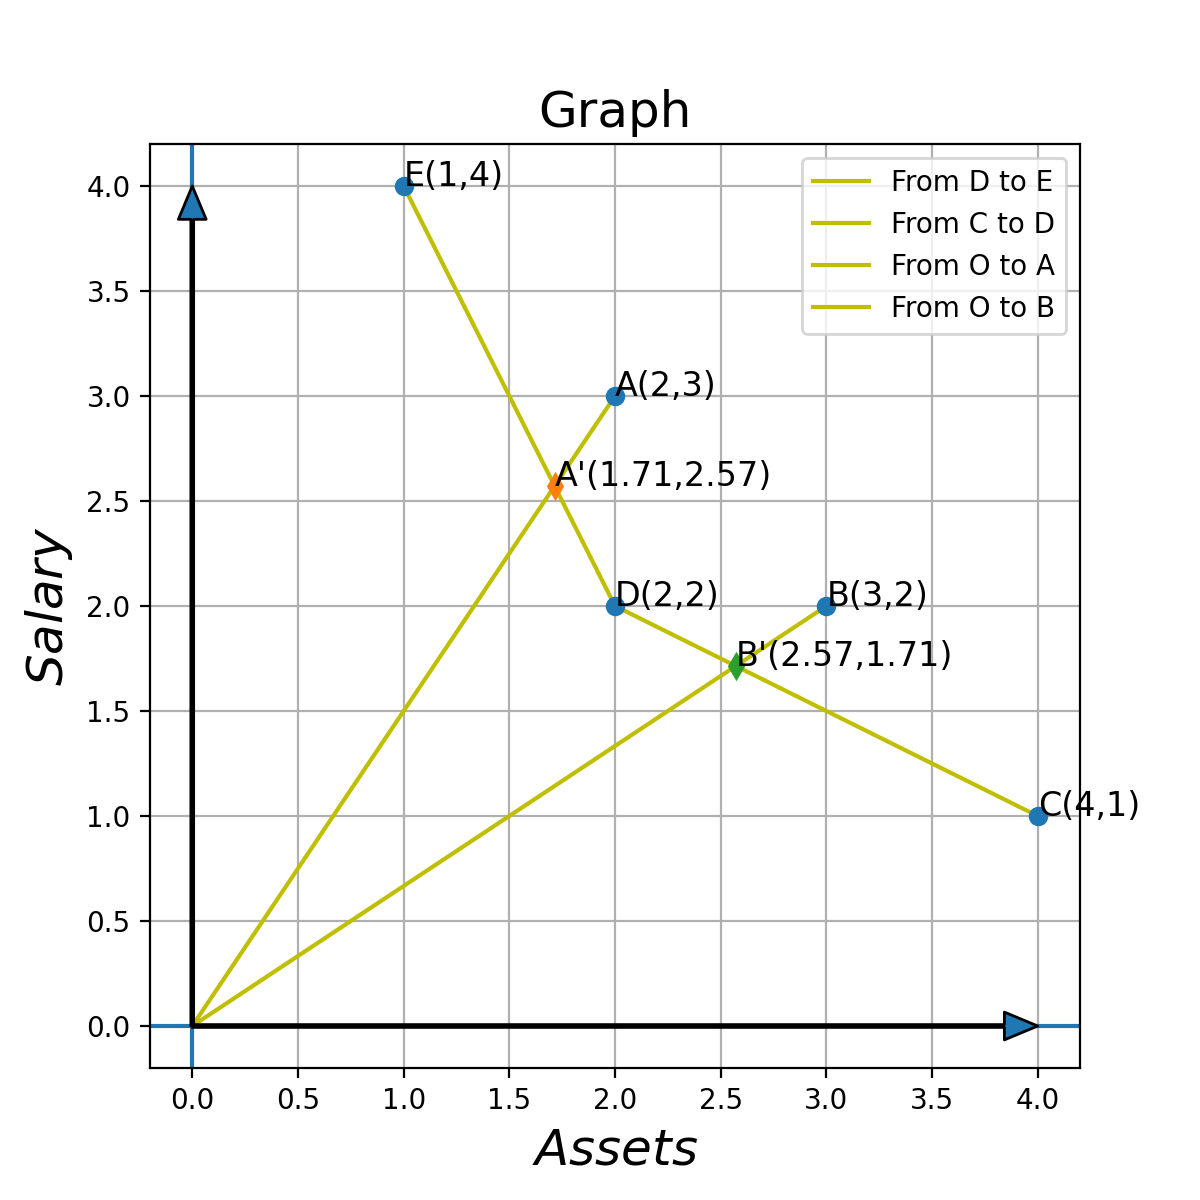

A'
D(0.714286):E(0.285714)
B'
C(0.285714):D(0.714286)


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(6, 6))
Data=[[2,3],[3,2],[4,1],[2,2],[1,4]]
nodeName=['A','B','C','D','E']
t = np.linspace(0,1,1000)
x1=Data[4][0]+t*(Data[3][0]-Data[4][0])
y1=Data[4][1]+t*(Data[3][1]-Data[4][1])
ax.plot(x1, y1, '-y', label='From D to E')

x2=Data[3][0]+t*(Data[2][0]-Data[3][0])
y2=Data[3][1]+t*(Data[2][1]-Data[3][1])
ax.plot(x2, y2, '-y', label='From C to D')

x3=0+t*(Data[0][0]-0)
y3=0+t*(Data[0][1]-0)
ax.plot(x3, y3, '-y', label='From O to A')

x4=0+t*(Data[1][0]-0)
y4=0+t*(Data[1][1]-0)
ax.plot(x4, y4, '-y', label='From O to B')

ax.plot([2,3,4,2,1],[3,2,1,2,4],'o')
ax.axhline(y=0, xmin=-4, xmax=4)
ax.axvline(x=0, ymin=0, ymax=8)
ax.annotate("", xy=(0, 4), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.annotate("", xy=(4, 0), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.set_xlabel('$Assets$',fontsize=18)
ax.set_ylabel('$Salary$',fontsize=18)
ax.set_title('Graph',fontsize=18)
for i in range(5):
    ax.text(Data[i][0],Data[i][1],'%s(%d,%d)'%(nodeName[i],Data[i][0],Data[i][1]),fontsize=12)

j,i1,i2=0,4,3
Acons=np.array([[Data[j][0],Data[i1][0]-Data[i2][0]],[Data[j][1],Data[i1][1]-Data[i2][1]]])
b=np.array([Data[i1][0],Data[i1][1]])
sol=np.linalg.inv(Acons).dot(b)
t=sol[1]
x1=Data[i1][0]+t*(Data[i2][0]-Data[i1][0])
y1=Data[i1][1]+t*(Data[i2][1]-Data[i1][1])
ax.plot(x1,y1,'d')
ax.text(x1,y1,('A\'('+str(round(x1, 2))+','+str(round(y1, 2))+')'),fontsize=12)

print('A\'')
print('%s(%f):%s(%f)'%('D',t,'E',1-t))

j,i1,i2=1,3,2
Acons=np.array([[Data[j][0],Data[i1][0]-Data[i2][0]],[Data[j][1],Data[i1][1]-Data[i2][1]]])
b=np.array([Data[i1][0],Data[i1][1]])
sol=np.linalg.inv(Acons).dot(b)
t=sol[1]
x1=Data[i1][0]+t*(Data[i2][0]-Data[i1][0])
y1=Data[i1][1]+t*(Data[i2][1]-Data[i1][1])
ax.plot(x1,y1,'d')
ax.text(x1,y1,('B\'('+str(round(x1, 2))+','+str(round(y1, 2))+')'),fontsize=12)

print('B\'')
print('%s(%f):%s(%f)'%('C',t,'D',1-t))

ax.legend(loc='upper right',fontsize=10)
ax.grid()


<h3>五所大學資料包絡分析結果</h3>

<table>
  <tr>
    <th style="text-align: center;">大學</th>
    <th style="text-align: center;">相對效率</th>
    <th style="text-align: center;">效率評鑑參考集合</th>
  </tr>
  <tr>
    <td style="text-align: center;">A</td>
    <td style="text-align: center;">0.857</td>
    <td style="text-align: center;">D(0.714) ; E(0.286)</td>
  </tr>
  <tr>
    <td style="text-align: center;">B</td>
    <td style="text-align: center;">0.857</td>
    <td style="text-align: center;">C(0.286) ; D(0.714)</td>
  </tr>
  <tr>
    <td style="text-align: center;">C</td>
    <td style="text-align: center;">1</td>
    <td style="text-align: center;">無</td>
  </tr>
  <tr>
    <td style="text-align: center;">D</td>
    <td style="text-align: center;">1</td>
    <td style="text-align: center;">無</td>
  </tr>
  <tr>
    <td style="text-align: center;">E</td>
    <td style="text-align: center;">1</td>
    <td style="text-align: center;">無</td>
  </tr>
</table>

<h3>IPM計算A大學欠缺效率的幅度</h3>

<table class="dataframe">

  <tbody>
      <th rowspan="2" valign="top">產出/投入項目 </th>
      <td colspan="2" style="text-align: center;">D大學</td>
      <td colspan="2" style="text-align: center;">E大學</td>
      <td colspan="3" style="text-align: center;">A大學</td>
    </tr>
    <tr>
      <th>實際投入產出</th>
      <th>權重</th>
      <th>實際投入產出</th>
      <th>權重</th>
      <th>投入產出投射</th>
      <th>實際投入產出</th>
      <th>射線差額</th>
    </tr>
    <tr>
      <th>學生註冊人數</th>
      <td style="text-align: center;">1000</td>
      <td style="text-align: center;">0.714</td>
      <td style="text-align: center;">1000</td>
      <td style="text-align: center;">0.286</td>
      <td style="text-align: center;">1000</td>
      <td style="text-align: center;">1000</td>
      <td style="text-align: center;">0</td>
    </tr>
    <tr>
      <th>教職員給(千萬)</th>
      <td style="text-align: center;">2</td>
      <td style="text-align: center;">0.714</td>
      <td style="text-align: center;">1</td>
      <td style="text-align: center;">0.286</td>
      <td style="text-align: center;">1.71</td>
      <td style="text-align: center;">2</td>
      <td style="text-align: center;">0.29</td>
    </tr>
    <tr>
      <th>校產(百億)</th>
      <td style="text-align: center;">2</td>
      <td style="text-align: center;">0.714</td>
      <td style="text-align: center;">4</td>
      <td style="text-align: center;">0.286</td>
      <td style="text-align: center;">2.57</td>
      <td style="text-align: center;">3</td>
      <td style="text-align: center;">0.43</td>
    </tr>
  </tbody>
</table>

<h3>IPM計算B大學欠缺效率的幅度</h3>

<table class="dataframe">

  <tbody>
      <th rowspan="2" valign="top">產出/投入項目 </th>
      <td colspan="2" style="text-align: center;">C大學</td>
      <td colspan="2" style="text-align: center;">D大學</td>
      <td colspan="3" style="text-align: center;">B大學</td>
    </tr>
    <tr>
      <th>實際投入產出</th>
      <th>權重</th>
      <th>實際投入產出</th>
      <th>權重</th>
      <th>投入產出投射</th>
      <th>實際投入產出</th>
      <th>射線差額</th>
    </tr>
    <tr>
      <th>學生註冊人數</th>
      <td style="text-align: center;">1000</td>
      <td style="text-align: center;">0.286</td>
      <td style="text-align: center;">1000</td>
      <td style="text-align: center;">0.714</td>
      <td style="text-align: center;">1000</td>
      <td style="text-align: center;">1000</td>
      <td style="text-align: center;">0</td>
    </tr>
    <tr>
      <th>教職員給(千萬)</th>
      <td style="text-align: center;">4</td>
      <td style="text-align: center;">0.286</td>
      <td style="text-align: center;">2</td>
      <td style="text-align: center;">0.714</td>
      <td style="text-align: center;">2.57</td>
      <td style="text-align: center;">3</td>
      <td style="text-align: center;">0.43</td>
    </tr>
    <tr>
      <th>校產(百億)</th>
      <td style="text-align: center;">1</td>
      <td style="text-align: center;">0.286</td>
      <td style="text-align: center;">2</td>
      <td style="text-align: center;">0.714</td>
      <td style="text-align: center;">1.71</td>
      <td style="text-align: center;">2</td>
      <td style="text-align: center;">0.29</td>
    </tr>
  </tbody>
</table>